<a href="https://colab.research.google.com/github/JasonSCFu/Image_Processing_100_Questions/blob/master/Extract_Form_Checkbox_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This simple notebook is to illustrate how to use opencv to detect checkboxes in forms which are commonly seen in a lot of use cases.

#### Step One: Importing necessary libraries and reading the image

In [ ]:
# install opencv and numpy
!pip3 install opencv-python numpy

# import libraries
import os
import cv2
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# read image into array
image_array = cv2.imread('/content/drive/MyDrive/checkbox.png')

# check array type
type(image_array)

numpy.ndarray

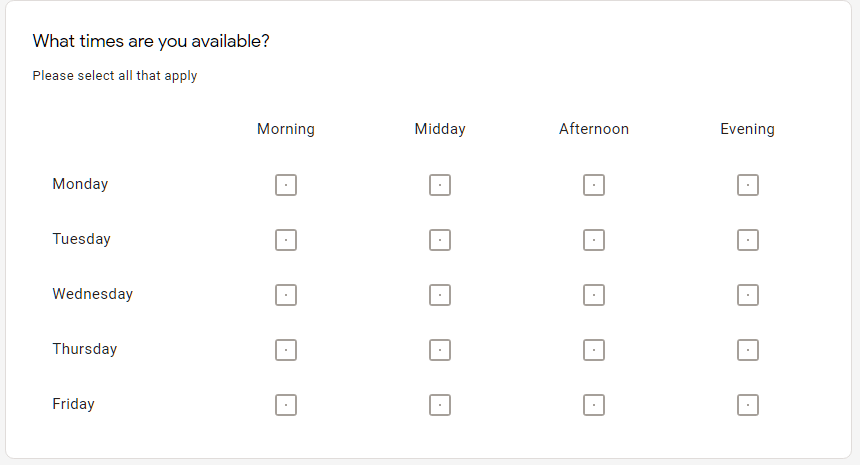

In [12]:
raw = Image.fromarray(image_array)
display(raw)

#### Step Two: Image binarization - Gray Scale

The image we are using might have lots of noise, skew, and unnecessary information. Let’s convert this 3-channel image (RGB- red, blue, green) into a 2-channel image (grayscale) to make our detection more accurate. This also helps reduce the noise and uneasy information but can also help increase the performance when working with large images. Additionally, we can apply the binary thresholding technique to reduce the complexity of the image / further increase the contrast of the image. This process is sometimes described as separating an image into foreground values (black) and background values (white).

In [ ]:
# convering image to gray scale
gray_scale_image = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)

# image thresholding

_, img_bin = cv2.threshold(gray_scale_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

img_bin = 255 - img_bin

In [ ]:
img_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

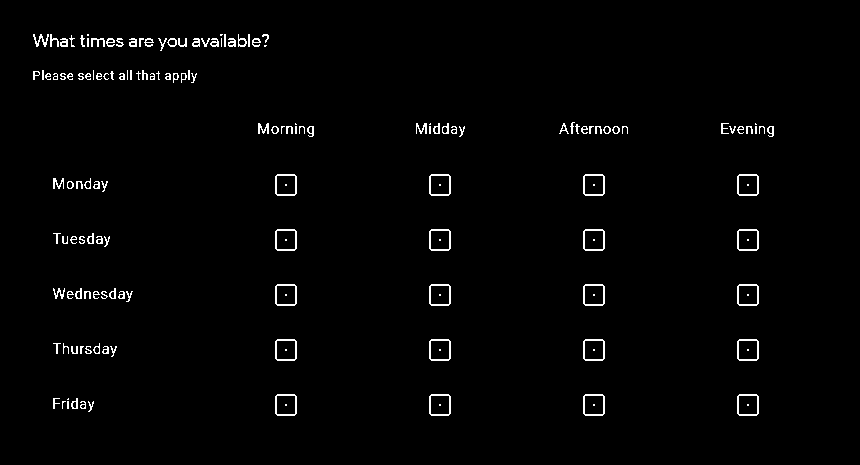

In [10]:
from PIL import Image
from numpy import *
from google.colab.patches import cv2_imshow

img = Image.fromarray(img_bin)
display(img)

#### Step Three: Using morphological operations to identify edges


The thresholded image still contains some elements that are not needed, such as text and other noise which are not required. Therefore, let us identify the vertical and horizontal lines that make up checkboxes to sort these out. It can be achieved by performing morphological operations on the image. The idea is to initially extract vertical and horizontal components of the boxes separately by using special filters. Lastly, we will combine the horizontal and vertical lines to form squares and rectangles and identify checkboxes from the image.

In [14]:
# set min width to detect horizontal lines
line_min_width = 15

# kernel to detect horizontal lines
kernal_h = np.ones((1,line_min_width), np.uint8)

# kernel to detect vertical lines
kernal_v = np.ones((line_min_width,1), np.uint8)

# horizontal kernel on the image
img_bin_h = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_h)

# verical kernel on the image
img_bin_v = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernal_v)


# combining the image

img_bin_final=img_bin_h|img_bin_v

In [21]:
img_bin_h

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

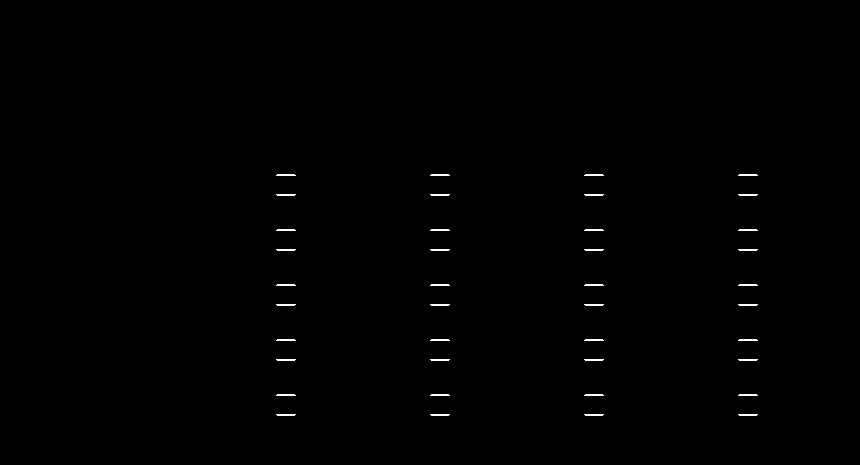

In [17]:
img_bin_h_1 = Image.fromarray(img_bin_h)
display(img_bin_h_1)

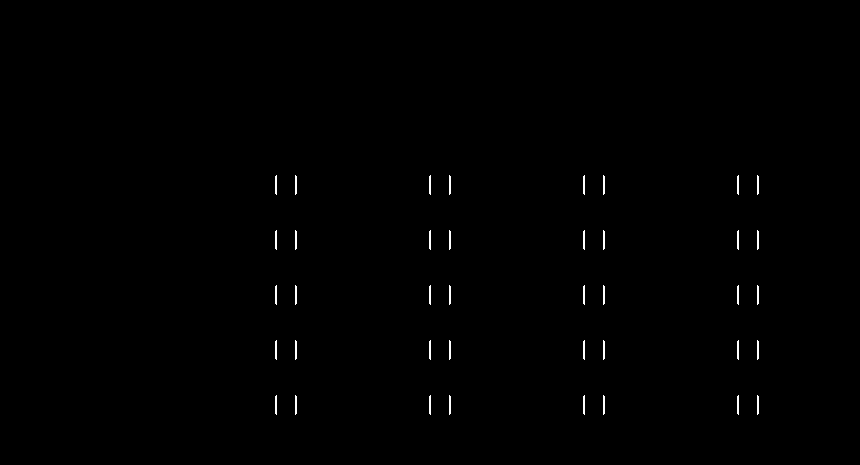

In [18]:
img_bin_v_1 = Image.fromarray(img_bin_v)
display(img_bin_v_1)

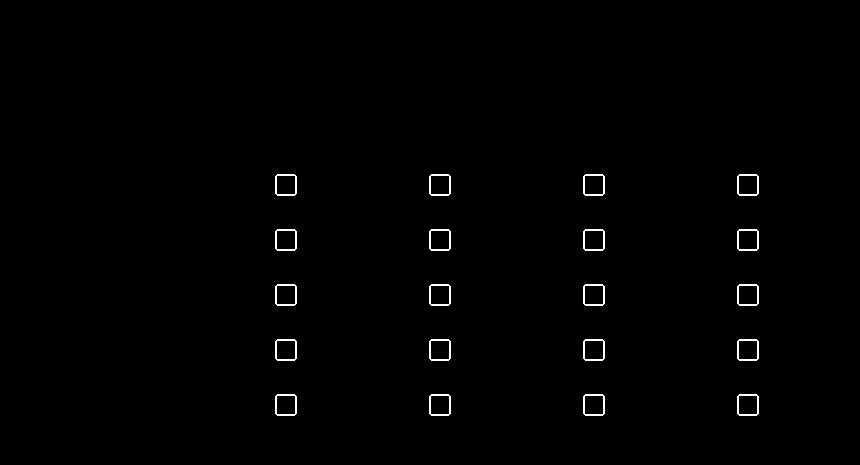

In [16]:
img_bin_final_1 = Image.fromarray(img_bin_final)
display(img_bin_final_1)

#### Step Four: Contours Filtering

In the last step, we simply note down the regions of detected bounding boxes (horizontal and vertical lines) and draw them on the original image array. To do this, we will be using the connectedComponentsWithStats from cv2. This will save all the contours into an array which we will be using to draw them on the original image. Follow the below code snippet:

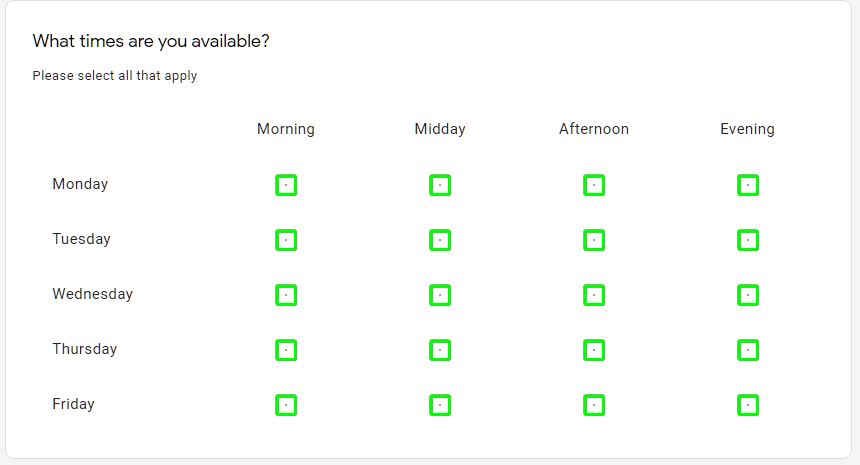

In [19]:
_, labels, stats,_ = cv2.connectedComponentsWithStats(~img_bin_final, connectivity=8, ltype=cv2.CV_32S)

for x,y,w,h,area in stats[2:]:
    cv2.rectangle(image_array,(x,y),(x+w,y+h),(0,255,0),2)

contours = Image.fromarray(image_array)
display(contours)